# Multiple Regression Applied Lecture

Topics covered:
* Mutliple Regression
* Binary predictors
* Categorical predictors
* Interactions
* F-test vs individual t-tests

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
# from sklearn.datasets import load_diabetes
from math import sqrt

## Motor Trend Cars Dataset
The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).


* mpg	Miles/(US) gallon
* cyl	Number of cylinders
* disp	Displacement (cu.in.)
* hp	Gross horsepower
* drat	Rear axle ratio
* wt	Weight (1000 lbs)
* qsec	1/4 mile time
* vs	Engine (0 = V-shaped, 1 = straight)
* am	Transmission (0 = automatic, 1 = manual)
* gear	Number of forward gears
* carb	Number of carburetors

In [2]:
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Simple Linear Regression with two different predictors

In [3]:
results = smf.ols('qsec ~ hp', data=mtcars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   qsec   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     30.19
Date:                Thu, 30 May 2024   Prob (F-statistic):           5.77e-06
Time:                        17:48:38   Log-Likelihood:                -52.333
No. Observations:                  32   AIC:                             108.7
Df Residuals:                      30   BIC:                             111.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.5564      0.542     37.897      0.000      19.449      21.664
hp            -0.0185      0.003     -5.495      0.000      -0.025      -0.012
==============================================================================
Omnibus:                        7.936   Durbin-Watson:                   1.235
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.215
Skew:                           0.734   Prob(JB):                       0.0271
Kurtosis:                       4.804   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
results = smf.ols('qsec ~ wt', data=mtcars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   qsec   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9446
Date:                Thu, 30 May 2024   Prob (F-statistic):              0.339
Time:                        17:48:38   Log-Likelihood:                -62.978
No. Observations:                  32   AIC:                             130.0
Df Residuals:                      30   BIC:                             132.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.8753      1.103     17.120      0.000      16.624      21.127
wt            -0.3191      0.328     -0.972      0.339      -0.990       0.351
==============================================================================
Omnibus:                        2.374   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.305   Jarque-Bera (JB):                1.179
Skew:                           0.343   Prob(JB):                        0.555
Kurtosis:                       3.644   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Is weight an irrelevant variable for the prediction?
* How would we make a prediction using these two models?
### Multiple Regression

In [5]:
y = 18.8256 + (-0.0273)*100 + 0.9415*2.0
y

17.9786

In [6]:
results = smf.ols('qsec ~ hp + wt', data=mtcars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   qsec   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     27.17
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.25e-07
Time:                        17:48:38   Log-Likelihood:                -46.584
No. Observations:                  32   AIC:                             99.17
Df Residuals:                      29   BIC:                             103.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.8256      0.672     28.020      0.000      17.451      20.200
hp            -0.0273      0.004     -7.197      0.000      -0.035      -0.020
wt             0.9415      0.266      3.541      0.001       0.398       1.485
==============================================================================
Omnibus:                       15.651   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.372
Skew:                           1.201   Prob(JB):                     2.29e-05
Kurtosis:                       6.204   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
corr = mtcars.corr()
corr.style.background_gradient(cmap='RdBu')

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


### Matrix Approach

In [8]:
Y = mtcars['qsec'].to_numpy()
#X = mtcars[['hp', 'wt']].to_numpy()
X = mtcars['hp'].to_numpy()

In [9]:
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     30.19
Date:                Thu, 30 May 2024   Prob (F-statistic):           5.77e-06
Time:                        17:48:38   Log-Likelihood:                -52.333
No. Observations:                  32   AIC:                             108.7
Df Residuals:                      30   BIC:                             111.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.5564      0.542     37.897      0.000      19.449      21.664
x1            -0.0185      0.003     -5.495      0.000      -0.025      -0.012
==============================================================================
Omnibus:                        7.936   Durbin-Watson:                   1.235
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.215
Skew:                           0.734   Prob(JB):                       0.0271
Kurtosis:                       4.804   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

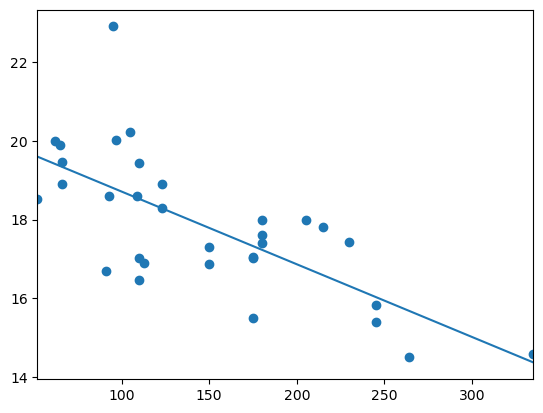

In [10]:
fig = sm.graphics.abline_plot(model_results=results)
ax = fig.axes[0]
ax.scatter(X[:,1], Y)
plt.show

In [12]:
# plt.scatter(X,Y)
# plt.xlim(0,400)
# plt.ylim(0,25)

### What if we include a lot of variables? Is that better?

In [13]:
results = smf.ols('qsec ~ hp + wt + mpg + cyl + disp', data=mtcars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   qsec   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     13.85
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.22e-06
Time:                        17:49:07   Log-Likelihood:                -42.701
No. Observations:                  32   AIC:                             97.40
Df Residuals:                      26   BIC:                             106.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.8615      3.379      5.286      0.000      10.916      24.807
hp            -0.0177      0.005     -3.411      0.002      -0.028      -0.007
wt             1.6198      0.510      3.175      0.004       0.571       2.669
mpg            0.0407      0.078      0.521      0.607      -0.120       0.201
cyl           -0.4881      0.285     -1.715      0.098      -1.073       0.097
disp          -0.0019      0.005     -0.382      0.705      -0.012       0.008
==============================================================================
Omnibus:                        6.165   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.835
Skew:                           0.637   Prob(JB):                       0.0892
Kurtosis:                       4.415   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We'll talk about how to select an *optimal* model in modules 8 and 9.
### Binary predictors

In [14]:
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


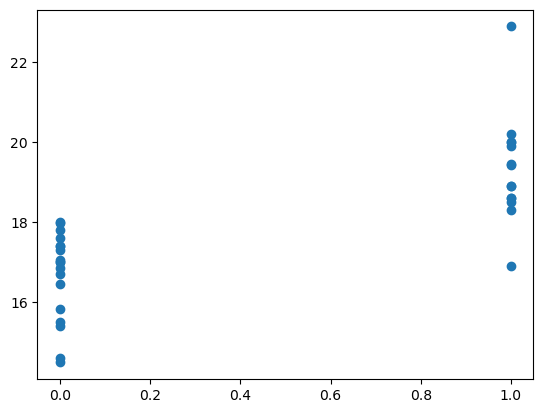

In [15]:
plt.scatter(mtcars['vs'], mtcars['qsec'])

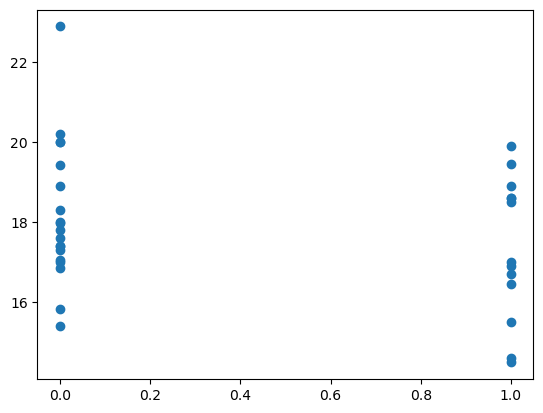

In [16]:
plt.scatter(mtcars['am'], mtcars['qsec'])

In [17]:
results = smf.ols('qsec ~ vs', data=mtcars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   qsec   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     37.31
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.03e-06
Time:                        17:49:07   Log-Likelihood:                -50.543
No. Observations:                  32   AIC:                             105.1
Df Residuals:                      30   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.6939      0.286     58.406      0.000      16.110      17.278
vs             2.6397      0.432      6.109      0.000       1.757       3.522
==============================================================================
Omnibus:                        3.470   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                2.326
Skew:                           0.256   Prob(JB):                        0.312
Kurtosis:                       4.217   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

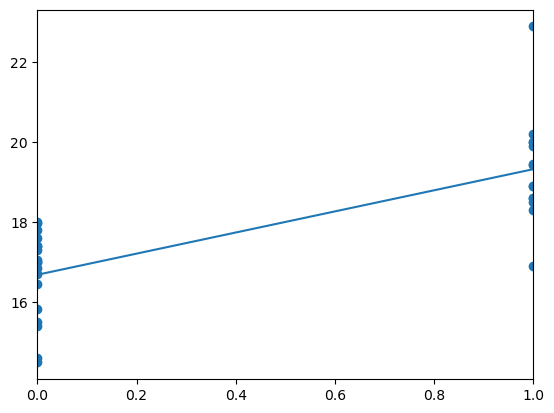

In [18]:
fig = sm.graphics.abline_plot(model_results=results)
ax = fig.axes[0]
ax.scatter(mtcars['vs'], mtcars['qsec'])
plt.show

In [19]:
results = smf.ols('qsec ~ hp + wt + am', data=mtcars).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   qsec   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     20.68
Date:                Thu, 30 May 2024   Prob (F-statistic):           2.88e-07
Time:                        17:49:07   Log-Likelihood:                -44.784
No. Observations:                  32   AIC:                             97.57
Df Residuals:                      28   BIC:                             103.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.4326      1.092     18.713      0.000      18.196      22.669
hp            -0.0245      0.004     -6.165      0.000      -0.033      -0.016
wt             0.4435      0.374      1.186      0.246      -0.322       1.209
am            -1.0385      0.569     -1.826      0.079      -2.203       0.126
==============================================================================
Omnibus:                       14.170   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.320
Skew:                           1.207   Prob(JB):                     0.000286
Kurtosis:                       5.532   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Categorical Predictors

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?ref=hackernoon.com&select=Car+details+v3.csv

In [20]:
cardekho = pd.read_csv('Car details v3.csv')
cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

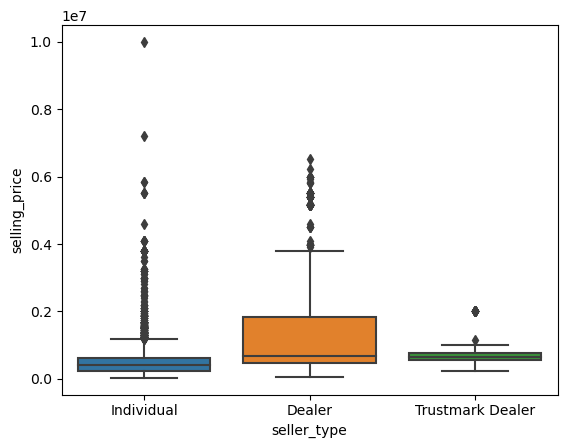

In [21]:
import seaborn as sns
sns.boxplot(x='seller_type', y='selling_price', data = cardekho)

In [22]:
results = smf.ols('selling_price ~ seller_type', data=cardekho).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     799.2
Date:                Thu, 30 May 2024   Prob (F-statistic):          1.38e-317
Time:                        17:49:07   Log-Likelihood:            -1.2134e+05
No. Observations:                8128   AIC:                         2.427e+05
Df Residuals:                    8125   BIC:                         2.427e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        1.443e+06    2.2e+04     65.714      0.000     1.4e+06    1.49e+06
seller_type[T.Individual]       -9.449e+05   2.37e+04    -39.830      0.000   -9.91e+05   -8.98e+05
seller_type[T.Trustmark Dealer] -6.417e+05   5.28e+04    -12.159      0.000   -7.45e+05   -5.38e+05
==============================================================================
Omnibus:                     6090.871   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127338.329
Skew:                           3.451   Prob(JB):                         0.00
Kurtosis:                      21.120   Cond. No.                         8.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
results = smf.ols('selling_price ~ seller_type + year + km_driven', data=cardekho).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     766.4
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        17:49:08   Log-Likelihood:            -1.2077e+05
No. Observations:                8128   AIC:                         2.416e+05
Df Residuals:                    8123   BIC:                         2.416e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -1.312e+08   4.26e+06    -30.836      0.000    -1.4e+08   -1.23e+08
seller_type[T.Individual]       -7.601e+05   2.28e+04    -33.297      0.000   -8.05e+05   -7.15e+05
seller_type[T.Trustmark Dealer] -6.562e+05   4.92e+04    -13.338      0.000   -7.53e+05    -5.6e+05
year                             6.581e+04   2109.387     31.199      0.000    6.17e+04    6.99e+04
km_driven                          -0.3845      0.149     -2.574      0.010      -0.677      -0.092
==============================================================================
Omnibus:                     6259.658   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           144715.963
Skew:                           3.554   Prob(JB):                         0.00
Kurtosis:                      22.411   Cond. No.                     5.02e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interaction Effects
$$Y=\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2$$
$$Y=\beta_0 + (\beta_1 + \beta_3 X_2)X_1 + \beta_2 X_2$$

In [24]:
results = smf.ols('selling_price ~ year*km_driven', data=cardekho).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     676.0
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        17:49:08   Log-Likelihood:            -1.2117e+05
No. Observations:                8128   AIC:                         2.423e+05
Df Residuals:                    8124   BIC:                         2.424e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.225e+08   6.11e+06    -36.413      0.000   -2.35e+08   -2.11e+08
year            1.109e+05   3034.022     36.543      0.000    1.05e+05    1.17e+05
km_driven       1135.5528     71.410     15.902      0.000     995.570    1275.535
year:km_driven    -0.5650      0.036    -15.915      0.000      -0.635      -0.495
==============================================================================
Omnibus:                     6673.905   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159847.822
Skew:                           3.913   Prob(JB):                         0.00
Kurtosis:                      23.267   Cond. No.                     1.38e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predict price given mileage, engine, max_power

In [25]:
cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [26]:
print(cardekho.loc[0,'mileage'])
print(cardekho.loc[0,'engine'])
print(cardekho.loc[0,'max_power'])

23.4 kmpl
1248 CC
74 bhp


In [27]:
cardekho.loc[0,'mileage'].split(' ')

['23.4', 'kmpl']

In [28]:
cardekho.loc[0,'mileage'].split(' ')[0]

'23.4'

In [29]:
cardekho['mileage'].str.split(' ').str[0]

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8123     18.5
8124     16.8
8125     19.3
8126    23.57
8127    23.57
Name: mileage, Length: 8128, dtype: object

In [30]:
cardekho['mileage'] = cardekho['mileage'].str.split(' ').str[0]
cardekho['engine'] = cardekho['engine'].str.split(' ').str[0]
cardekho['max_power'] = cardekho['max_power'].str.split(' ').str[0]
cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,"11.5@ 4,500(kgm@ rpm)",5.0


In [31]:
results = smf.ols('selling_price ~ mileage + engine + max_power', data=cardekho).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     389.1
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        17:49:09   Log-Likelihood:            -1.0431e+05
No. Observations:                7907   AIC:                         2.100e+05
Df Residuals:                    7197   BIC:                         2.150e+05
Df Model:                         709                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3.732e+16   3.35e+16     -1.114      0.265   -1.03e+17    2.83e+16
mileage[T.10.0]      -2.727e+04   1.54e+05     -0.177      0.860    -3.3e+05    2.75e+05
mileage[T.10.1]      -2.711e+16   2.61e+16     -1.038      0.299   -7.83e+16    2.41e+16
mileage[T.10.5]      -5.576e+05   7.51e+04     -7.429      0.000   -7.05e+05    -4.1e+05
mileage[T.10.71]     -6218.2745   1.62e+05     -0.038      0.969   -3.23e+05    3.11e+05
mileage[T.10.75]     -2.225e+16   4.11e+16     -0.542      0.588   -1.03e+17    5.83e+16
mileage[T.10.8]       4.063e+17   5.79e+17      0.702      0.483   -7.28e+17    1.54e+18
mileage[T.10.9]      -5.796e+16   8.83e+16     -0.656      0.512   -2.31e+17    1.15e+17
mileage[T.10.91]      -4.41e+16   1.02e+17     -0.431      0.666   -2.45e+17    1.56e+17
mileage[T.10.93]      1.544e+17   3.51e+17      0.440      0.660   -5.34e+17    8.43e+17
mileage[T.11.0]      -4.357e+05   1.26e+05     -3.452      0.001   -6.83e+05   -1.88e+05
mileage[T.11.07]      5.418e+15   1.66e+16      0.327      0.744   -2.71e+16    3.79e+16
mileage[T.11.1]      -5.391e+16   7.24e+16     -0.744      0.457   -1.96e+17    8.81e+16
mileage[T.11.18]      7.642e+17   1.72e+17      4.454      0.000    4.28e+17     1.1e+18
mileage[T.11.2]      -1.119e+18    1.6e+17     -7.006      0.000   -1.43e+18   -8.06e+17
mileage[T.11.3]      -2.294e+16   7.13e+16     -0.322      0.748   -1.63e+17    1.17e+17
mileage[T.11.36]      5.234e+17   6.77e+17      0.773      0.440   -8.05e+17    1.85e+18
mileage[T.11.4]      -2.681e+17   1.25e+17     -2.138      0.033   -5.14e+17   -2.23e+16
mileage[T.11.45]      2.472e+16   2.95e+16      0.838      0.402   -3.31e+16    8.26e+16
mileage[T.11.5]      -2.325e+05   1.29e+05     -1.797      0.072   -4.86e+05    2.12e+04
mileage[T.11.57]     -5.136e+05   7.87e+04     -6.527      0.000   -6.68e+05   -3.59e+05
mileage[T.11.68]     -9.992e+04   1.05e+05     -0.947      0.343   -3.07e+05    1.07e+05
mileage[T.11.7]      -2.847e+05   1.64e+05     -1.739      0.082   -6.06e+05    3.62e+04
mileage[T.11.72]     -1.545e+17   4.37e+17     -0.353      0.724   -1.01e+18    7.03e+17
mileage[T.11.74]     -2.294e+16   7.13e+16     -0.322      0.748   -1.63e+17    1.17e+17
mileage[T.11.79]     -2.624e+05   7.62e+04     -3.444      0.001   -4.12e+05   -1.13e+05
mileage[T.11.8]      -1.619e+16   2.19e+17     -0.074      0.941   -4.46e+17    4.14e+17
mileage[T.11.88]      2.712e+04   1.46e+05      0.186      0.852   -2.59e+05    3.13e+05
mileage[T.11.9]      -2.681e+17   1.25e+17     -2.138      0.033   -5.14e+17   -2.23e+16
mileage[T.11.96]      2.701e+05   9.71e+04      2.781      0.005    7.97e+04    4.61e+05
mileage[T.12.0]      -3.915e+05   1.55e+05     -2.518      0.012   -6.96e+05   -8.67e+04
mileage[T.12.05]     -3.132e+05   6.72e+04     -4.660    

In [32]:
cardekho["mileage"] = pd.to_numeric(cardekho["mileage"])
cardekho["engine"] = pd.to_numeric(cardekho["engine"])
cardekho["max_power"] = pd.to_numeric(cardekho["max_power"])

In [33]:
results = smf.ols('selling_price ~ mileage + engine + max_power', data=cardekho).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     3797.
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        17:49:09   Log-Likelihood:            -1.1528e+05
No. Observations:                7906   AIC:                         2.306e+05
Df Residuals:                    7902   BIC:                         2.306e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.652e+06   4.98e+04    -33.152      0.000   -1.75e+06   -1.55e+06
mileage     3.327e+04   1778.398     18.706      0.000    2.98e+04    3.68e+04
engine       -65.5033     18.597     -3.522      0.000    -101.958     -29.049
max_power   1.912e+04    231.035     82.755      0.000    1.87e+04    1.96e+04
==============================================================================
Omnibus:                     4054.853   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61440.923
Skew:                           2.096   Prob(JB):                         0.00
Kurtosis:                      15.997   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
results = smf.ols('selling_price ~ mileage*engine + mileage*max_power + engine*max_power', data=cardekho).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2223.
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        17:49:09   Log-Likelihood:            -1.1490e+05
No. Observations:                7906   AIC:                         2.298e+05
Df Residuals:                    7899   BIC:                         2.299e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.111e+06   1.27e+05      8.733      0.000    8.62e+05    1.36e+06
mileage            -5.83e+04   5432.319    -10.732      0.000   -6.89e+04   -4.76e+04
engine             -922.1832     87.964    -10.484      0.000   -1094.615    -749.751
mileage:engine       17.9437      4.972      3.609      0.000       8.197      27.690
max_power         -9180.0652   1143.624     -8.027      0.000   -1.14e+04   -6938.261
mileage:max_power   758.5935     52.361     14.488      0.000     655.951     861.236
engine:max_power      7.2562      0.291     24.954      0.000       6.686       7.826
==============================================================================
Omnibus:                     4501.090   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111642.475
Skew:                           2.245   Prob(JB):                         0.00
Kurtosis:                      20.854   Cond. No.                     4.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Why shouldn't I just keep adding more and more variables to the model?